# Домашнее задание № 8
### Выполнил: Кузнецов С.И.

Загружаем данные, предварительно скачанные с https://www.kaggle.com/drgilermo/nba-players-stats

In [1]:
# Подгружаем необходимые библиотеки
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
player_data = pd.read_csv('dataset/player_data.csv')
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [3]:
Players = pd.read_csv('dataset/Players.csv')
Players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [4]:
Seasons_Stats = pd.read_csv('dataset/Seasons_Stats.csv')
Seasons_Stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


## Задача 1.
Посмотреть, как долго игроки играют в NBA.

Для построения распределения продолжительности игровой карьеры игроков построим **гистограмму** 

Text(0, 0.5, 'Количество игроков')

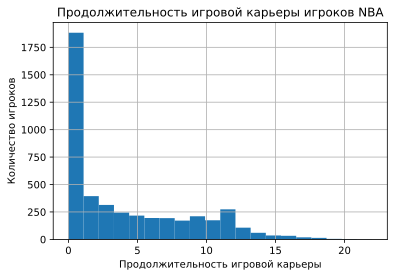

In [5]:
# Вычисляем продолжительность игровой карьеры для каждого игрока
player_data['carieer_length'] = player_data.apply(lambda row: row['year_end'] - row['year_start'], axis = 1)

# Строим гистограмму
ax = player_data.carieer_length.hist(bins = 20)
ax.set_title('Продолжительность игровой карьеры игроков NBA')
ax.set_xlabel('Продолжительность игровой карьеры')
ax.set_ylabel('Количество игроков')

**Вывод:** Основная масса игроков играет в NBA менее года, но есть те, кто играет 20 лет

## Задача 2.
Проверим зависимость между ростом и весом игрока и показателями результативности:
* Среднее количество набранных очков за игру
* Среднее количество заброшенных двухочковых
* Среднее количество заброшенных трехочковых

Для поиска зависимостей воспользуемся **skatterplot**

In [6]:
# Вычисляем статистику по играм:

game_stat = Seasons_Stats.groupby('Player').agg({'3P':'mean', '2P': 'mean', 'PTS': 'mean', 'G': 'sum'})\
    .reset_index()

# Показатели в расчете на одну игру 
game_stat['avg_3p'] = game_stat.apply(lambda row: row['3P'] / row['G'], axis = 1) # Среднее количество 3-очковых
game_stat['avg_2p'] = game_stat.apply(lambda row: row['2P'] / row['G'], axis = 1) # Среднее количество 2-очковых
game_stat['avg_pts'] = game_stat.apply(lambda row: row['PTS'] / row['G'], axis = 1) # Среднее количество очков

game_stat.head()

,Player,3P,2P,PTS,G,avg_3p,avg_2p,avg_pts
0,A.C. Green,6.944444,258.5,718.222222,1361.0,0.005102,0.189934,0.527717
1,A.J. Bramlett,0.000000,4.0,8.000000,8.0,0.000000,0.500000,1.000000
2,A.J. English,4.500000,304.0,751.000000,151.0,0.029801,2.013245,4.973510
3,A.J. Guyton,24.333333,31.0,147.333333,80.0,0.304167,0.387500,1.841667
4,A.J. Hammons,5.000000,12.0,48.000000,22.0,0.227273,0.545455,2.181818


In [7]:
# Строим статитсику по игрокам
players_stat = Players[['Player', 'height', 'weight']]
players_stat = players_stat.merge(game_stat, on = 'Player', how = 'inner')
players_stat = players_stat[players_stat['PTS'] > 0]
players_stat = players_stat.fillna(0)
players_stat.head()

,Player,height,weight,3P,2P,PTS,G,avg_3p,avg_2p,avg_pts
0,Curly Armstrong,180.0,77.0,0.0,108.0,330.000000,101.0,0.0,1.069307,3.267327
1,Cliff Barker,188.0,83.0,0.0,67.0,185.666667,149.0,0.0,0.449664,1.246085
2,Leo Barnhorst,193.0,86.0,0.0,271.2,646.400000,344.0,0.0,0.788372,1.879070
3,Ed Bartels,196.0,88.0,0.0,17.0,49.500000,47.0,0.0,0.361702,1.053191
4,Ralph Beard,178.0,79.0,0.0,374.5,1003.000000,126.0,0.0,2.972222,7.960317


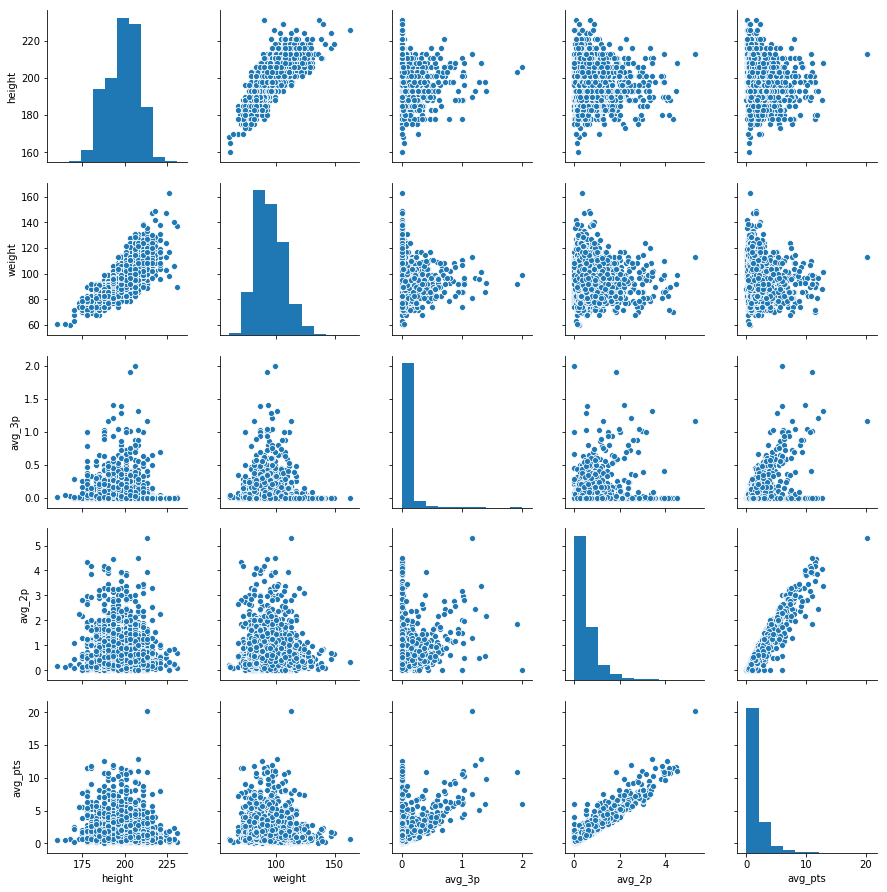

In [8]:
# Строим scatterplot
%config InlineBackend.figure_format = 'png' 
sns.pairplot(players_stat[['height', 'weight', 'avg_3p', 'avg_2p', 'avg_pts']])

**Вывод:** явной зависимости между ростом, весом и результативностью не выявлено, но есть подозрения, что чем больше вес игрока, тем меньше очков он зарабатывает за игру.

## Задача 3.
Проверить предположение, что чем больше вес игрока, тем меньше очков он зарабатывает за игру.

Для этого с помощью **joinplot** построим совместное распределение веса игрока и среднего количества очков за игру

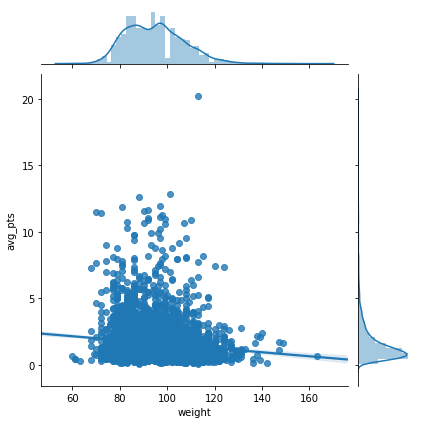

In [9]:
sns.jointplot(x='weight', y='avg_pts', data=players_stat, kind='reg');

**Вывод:** Предположение верно

## Задача 4.
Выяснить, как зависит количество заработанных очков от позиции игрока.

Воспользуемся **boxplot**, чтобы изобразить статистику набранных очков в зависимости от позиции игрока.

In [10]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [11]:
# Вычисляем статистику по позициям
positions_stats = Seasons_Stats[['Pos', 'G', 'PTS']]
positions_stats['PTS_to_games'] = positions_stats.apply(lambda row: row['PTS'] / row['G'], axis = 1)
positions_stats.head()

,Pos,G,PTS,PTS_to_games
0,G-F,63.0,458.0,7.269841
1,SG,49.0,279.0,5.693878
2,SF,67.0,438.0,6.537313
3,F,15.0,63.0,4.200000
4,F,13.0,59.0,4.538462


In [12]:
# Строим boxplot
data = []

for pos in positions_stats.Pos.unique():
    data.append(
        go.Box(y=positions_stats[positions_stats.Pos==pos].PTS_to_games, 
               name=pos)
    )

layout = go.Layout(
    title='Position statistic',
    yaxis=dict(
        title='Points per game',
        zeroline=False
    ),
    boxmode='group'
)
iplot(go.Figure(data, layout), show_link = False)

**Вывод:** Количество заработанных очков зависит от позиции игрока

## Задача 5.
Посмотреть динамику количества игроков в разрезе колледжей.

Чтобы показать динамику top-10 колледжей с 2010 года воспользуемся **heatmap**
Чтобы показать динамику top-3 колледжей с 1950 года воспользуемся **line chart**

In [13]:
#Строим статистику по колледжам

college_stats = Seasons_Stats.merge(Players[['Player', 'collage']], on = 'Player', how = 'inner')
college_stats = college_stats[~college_stats.Year.isnull()]
college_stats.Year = college_stats.Year.astype(int)
college_stats_since_2010 = college_stats[college_stats.Year >= 2010]
college_stats_since_2010.head()


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,collage
3806,21570,2012,Greg Smith,C,21.0,HOU,8.0,0.0,69.0,12.3,...,5.0,15.0,20.0,1.0,2.0,5.0,1.0,17.0,14.0,Western Kentucky University
3807,22148,2013,Greg Smith,C,22.0,HOU,70.0,10.0,1110.0,16.1,...,111.0,210.0,321.0,25.0,18.0,40.0,41.0,175.0,421.0,Western Kentucky University
3808,22759,2014,Greg Smith,C,23.0,HOU,11.0,0.0,100.0,13.7,...,11.0,16.0,27.0,0.0,1.0,2.0,5.0,17.0,38.0,Western Kentucky University
3809,23403,2015,Greg Smith,PF,24.0,DAL,42.0,2.0,363.0,10.2,...,26.0,53.0,79.0,9.0,7.0,11.0,11.0,53.0,80.0,Western Kentucky University
3810,23996,2016,Greg Smith,PF,25.0,MIN,18.0,0.0,192.0,7.9,...,12.0,30.0,42.0,6.0,4.0,1.0,7.0,28.0,43.0,Western Kentucky University


In [14]:
# TOP-10 колледжей
top_10_collages = college_stats_since_2010.collage.value_counts().reset_index()['index'].head(10).tolist()
top_10_collages

['University of Kentucky',
 'Duke University',
 'University of California, Los Angeles',
 'University of Kansas',
 'University of North Carolina',
 'University of Arizona',
 'Syracuse University',
 'Louisiana State University',
 'University of Connecticut',
 'University of Florida']

In [15]:
# TOP-3 колледжа
top_3_collages = top_10_collages[:3]
top_3_collages

['University of Kentucky',
 'Duke University',
 'University of California, Los Angeles']

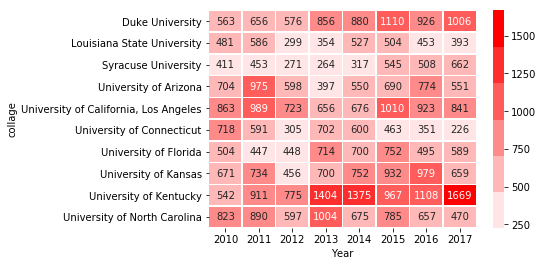

In [16]:
# Строим heatmap для TOP-10 колледжей
college_stats_since_2010 = college_stats_since_2010[college_stats_since_2010['collage'].isin(top_10_collages)]
college_stats_games = college_stats_since_2010.pivot_table(
                        index='collage', 
                        columns='Year', 
                        values='G', 
                        aggfunc=sum).fillna(0).applymap(float)

sns.heatmap(college_stats_games, annot=True, fmt=".0f", linewidths=0.5, cmap = sns.light_palette("red"));

In [17]:
college_stats_top_3 = college_stats[college_stats['collage'].isin(top_3_collages)]

college_stats_top_3_games = college_stats_top_3.pivot_table(
                            index='Year', 
                            columns='collage', 
                            values='G', 
                            aggfunc=sum).fillna(0).applymap(float)

data = [go.Scatter(x=college_stats_top_3_games.index, y=college_stats_top_3_games[c], name=c)\
        for c in college_stats_top_3_games.columns.values]

layout = {'title': 'Statistics top-3 collages', 'xaxis': {'title': 'Year'}, 'yaxis': {'title': 'Num of games'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)